In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from numba import jit
from sympy import integrate, oo, var
from sympy.physics.hydrogen import R_nl
from numerov.cy.core import radial_wf as radial_wf_cy
from numerov.core import radial_wf as radial_wf_py

numba.jit can provide significant speed improvements (faster than cython for `radial_wf` and comparable for `radial_integral`).

In [3]:
radial_wf_jit = jit(radial_wf_py)

In [4]:
step = 0.0001
n = 10
l = 5

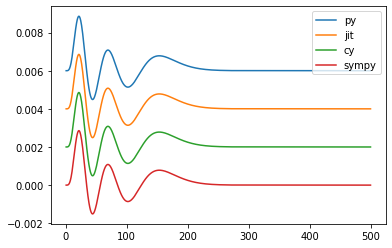

In [5]:
offset = 0.002

fig, ax = plt.subplots()

# python
r_py, y_py = radial_wf_py(n, l, step=step)
ax.plot(r_py, y_py + 3*offset, label="py")

# jit
r_jit, y_jit = radial_wf_jit(n, l, step=step)
ax.plot(r_jit, y_jit + 2*offset, label="jit")

# cython
r_cy, y_cy = radial_wf_cy(n, l, step=step)
ax.plot(r_cy, y_cy + offset, label="cy")

# sympy
y_sympy = [R_nl(n, l, r).evalf() for r in r_cy]
ax.plot(r_cy, y_sympy, label="sympy")

ax.legend(loc=0)
plt.show()

In [6]:
%timeit radial_wf_py(n, l, step=step)

66.4 ms ± 359 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
%timeit radial_wf_jit(n, l, step=step)

4.28 ms ± 23 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%timeit radial_wf_cy(n, l, step=step)

15.3 ms ± 1.93 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
from numerov.cy.core import radial_integral as radial_integral_cy
from numerov.core import radial_integral as radial_integral_py
radial_integral_jit = jit(radial_integral_py)

In [10]:
n1, l1 = 14, 1
n2, l2 = 13, 2

In [11]:
# python
radial_integral_py(n1, l1, n2 ,l2, step=step)

47.82964249999974

In [12]:
%timeit radial_integral_py(n1, l1, n2 ,l2, step=step)

115 ms ± 7.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
# numba.jit
radial_integral_jit(n1, l1, n2 ,l2, step=step)

47.829642499999736

In [14]:
%timeit radial_integral_jit(n1, l1, n2 ,l2, step=step)

3.48 ms ± 10.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
# cython
radial_integral_cy(n1, l1, n2 ,l2, step=step)

47.82964250000002

In [16]:
%timeit radial_integral_cy(n1, l1, n2 ,l2, step=step)

3.76 ms ± 7.75 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
# sympy
var("r")
integrate(R_nl(n1, l1, r) * r**3 * R_nl(n2, l2, r), (r, 0, oo)).evalf()

47.8295909083453

In [18]:
%timeit integrate(R_nl(n1, l1, r) * r**3 * R_nl(n2, l2, r), (r, 0, oo)).evalf()

158 ms ± 3.22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
